# **Logistic Regression via `sklearn` and `statsmodels`**

## **0.** Settings

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score
from numpy.random            import uniform, binomial

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

%matplotlib inline

## **1.** Dataset

In the case of logistic regression $Y$ is a categorical value ($0$ or $1$) and it is modeled as:

$\qquad
\begin{cases}
        \;Y \sim Bernoulli(\mu)\\
        \;\log(\frac{\mu}{1-\mu}) = \beta_0 + \beta_1 \cdot X\\
        \;\mu = \frac{1}{1+e^{- (\beta_0 + \beta_1 \cdot X)}}
\end{cases}
$

In [2]:
np.random.seed(42)

# Parameters
n_sample = 500
beta_0   = -7.0
beta_1   = 2.0
liminf_x = 1
limsup_x = 10

# Data simulation
x = uniform(liminf_x, limsup_x, size=n_sample)

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

mu = logistic_function(beta_0 + beta_1*x)
y  = binomial(n=1, p=mu)

## **2.** Logistic Regression with `sklearn`

True model: y ~ Bernoulli(μ)
True logit(μ) = log(μ/(1-μ)) = -7.0 + 2.0 * x
Regression logit(μ) = log(μ/(1-μ)) = -6.47 + 1.92 * x
Accuracy:  0.9466666666666667
Precision:  0.9537037037037037
Recall:  0.9716981132075472
F1:  0.9626168224299064


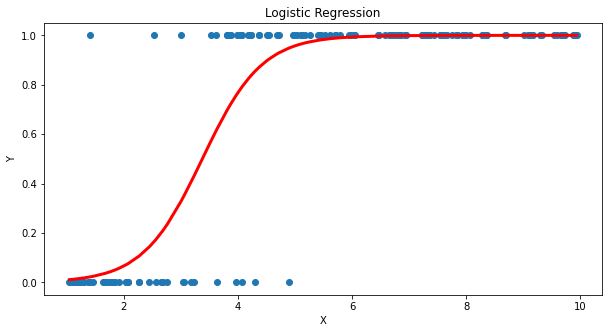

In [3]:
# Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Logistic Regression
#   Note:   It is needed to give both the fit and predict methods 2D arrays. 
#           Right now x_train and x_test are currently only 1 dimensional.
#           What we shoudl do to fix it is: 
x_train = x_train.reshape(-1, 1)

# Create linear regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train);

# Make predictions using the testing set
y_pred = model.predict(x_test.reshape(-1, 1))

# The coefficients
print('True model: y ~ Bernoulli(μ)')
print('True logit(μ) = log(μ/(1-μ)) =', beta_0, '+', beta_1, '* x')
print('Regression logit(μ) = log(μ/(1-μ)) = %.2f' % model.intercept_[0], '+ %.2f' % model.coef_[0][0], '* x')

# Metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

# Plot outputs
x_test_ord = x_test[x_test.argsort()]

plt.figure(figsize=(10,5));
plt.scatter(x_test, y_test);
plt.plot(x_test_ord, logistic_function(model.intercept_[0] + model.coef_[0][0]* x_test_ord), color='red', linewidth=3);
plt.title('Logistic Regression');
plt.xlabel('X');
plt.ylabel('Y');


Metrics:

* **Accuracy**: predicts the overall accuracy of the model $\big( = \frac{correct\;predictions}{predictions} \big)$

* **Precision**: percentage of *true* positive among all the *predicted* positive $\big( = \frac{true\;positive}{true\;positive \,+\, false\;positive} = \frac{true\;positive}{total\;predicted\;positive}\big)$

* **Recall**: percentage of the *predicted* positive among all the *true* positive $\big( = \frac{true\;positive}{true\;positive \,+\, false\;negative} = \frac{true\;positive}{total\;actual\;positive}\big)$

* **F1 Score**: *harmonic mean* between Precision and Recall values $\big( = 2\cdot\frac{precision\;\cdot\;recall}{precision \,+\, recall} \big)$<br>
*F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).*

A good summary:

<img src="..\Miscellaneous\confusion_matrix.png" width="600"/>

A good note:

<img src="..\Miscellaneous\accuracy_precision.png" width="600"/>

## **3.** Logistic Regression with `statsmodels`

In [4]:
# Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# To have the intercept in the model
x_train = sm.add_constant(x_train)
x_test  = sm.add_constant(x_test)

# Logistic Regression
model = sm.Logit(y_train, x_train)
model = model.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.168052
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  350
Model:                          Logit   Df Residuals:                      348
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Jun 2022   Pseudo R-squ.:                  0.7126
Time:                        16:12:45   Log-Likelihood:                -58.818
converged:                       True   LL-Null:                       -204.64
Covariance Type:            nonrobust   LLR p-value:                 2.189e-65
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9265      0.966     -7.172      0.000      -8.819      -5.034
x1             2.0528      0.

Some statistical tests.

* **LogLikelihood Ratio (LLR) test**<br>
$\quad$ `LLR p-value = 2.189e-65` <br>
This test has as $H_0$ the hypothesis that the model should be simplified, as $H_1$ the hypothesis that the model is good as it is. It is calculated as $-2\cdot\log\frac{likelihood(simple\;model)}{likelihood(fitted\;model)}$. If the p-value of this test is significantly small, then one can conclude that the predictor or set of predictors significantly improve the model's fit. This is analogous to the F-test used in linear regression analysis to assess the significance of prediction.

* **Z-test for the intercept and the coefficients**<br>
$\quad$ **`Intercept`** $\;$ `p-value = P>|t| = 0.00`<br>
$\quad$ **`Coefficient`** $\;$ `p-value = P>|t| = 0.00`<br>
The z-test helps to determine the correlation between the response and the predictor variables. The test is used in regression to test the null hypothesis $H_0$ that the slope or the coefficient is equal to zero.

True model: y ~ Bernoulli(μ)
True logit(μ) = log(μ/(1-μ)) = -7.0 + 2.0 * x
Regression logit(μ) = log(μ/(1-μ)) = -6.93 + 2.05 * x
Accuracy:  0.7066666666666667
Precision:  0.7066666666666667
Recall:  1.0
F1:  0.828125


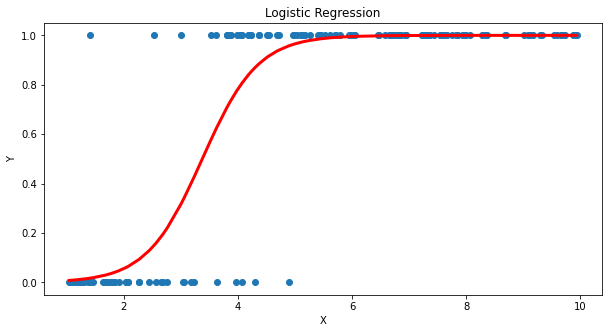

In [5]:
# Regression Line
y_pred = model.predict(x_test)

# The coefficients
print('True model: y ~ Bernoulli(μ)')
print('True logit(μ) = log(μ/(1-μ)) =', beta_0, '+', beta_1, '* x')
print('Regression logit(μ) = log(μ/(1-μ)) = %.2f' % model.params[0], '+ %.2f' % model.params[1], '* x')

# Metrics
print('Accuracy: ', accuracy_score(y_test, np.ceil(y_pred)))
print('Precision: ', precision_score(y_test, np.ceil(y_pred)))
print('Recall: ', recall_score(y_test, np.ceil(y_pred)))
print('F1: ', f1_score(y_test, np.ceil(y_pred)))

# Consider just the variable-column
x_test_single_col = pd.DataFrame(x_test)[1]

# Sort it (and y_pred)
idx = x_test_single_col.argsort()
x_test_ord, y_pred_ord = x_test_single_col[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x_test_single_col, y_test);
plt.plot(x_test_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Logistic Regression');
plt.xlabel('X');
plt.ylabel('Y');